Just look to see if the sequences overlap

In [1]:
## Load any changes to local modules
%load_ext autoreload
%autoreload 2

import os
import sys

pwd = %pwd
project_dir = '{0}/../../../'.format(pwd)
module_path = os.path.abspath(os.path.join(project_dir))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import re
import numpy as np
%matplotlib inline
from IPython.display import display


#from nbcpact import AnalyzeQuantCompare,Peptide,PeptideGroup,UcbreUtils,PeptidesFromPeptideListBuilder
from dpro.protdisc import PDReader

/home/jonesmic/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


ModuleNotFoundError: No module named 'dpro'

In [38]:
def load_ip2_peptide_list(file_path):
    
    df = pd.read_csv(file_path)
    df['ip2_sequence'] = df.sequence

    df['sequence'] = df.sequence.str.replace('\(\d+\.\d+\)','')

    num_records = df.index.size
    num_seqs = len(set(df['sequence']))

    decoy_df = df[df['protein'].str.contains('Reverse')]
    num_decoy_records = decoy_df.index.size
    percent_decoy_records = (num_decoy_records/num_records * 100)
    num_decoy_seqs = len(set(decoy_df['sequence']))
    percent_decoy_seqs = (num_decoy_seqs/num_seqs * 100)

    

    df = df[~df['protein'].str.contains('Reverse')]
    num_forward_recs = df.index.size
    num_forward_seqs = len(set(df['sequence']))
    

    msg = 'Records: Tot {}, Forward {} , Decoy {} ({:.0f}%)'.format(num_records, 
                                                               num_forward_recs, 
                                                               num_decoy_records, 
                                                               percent_decoy_records)
    print(msg)
    
    msg = 'Sequences: Tot {}, Forward {}, Decoy {} ({:.0f}%)'.format(num_seqs, 
                                                                      num_forward_seqs, 
                                                                      num_decoy_seqs, 
                                                                      percent_decoy_seqs)
    print(msg)
    
    
    df['RatioRank'] = df.AREA_MEDIAN_RATIO_1.rank(ascending=True)

    ax = sns.regplot(x="RatioRank", y="AREA_MEDIAN_RATIO_1", data=df)
    plt.figure()
    
    intersection = set(df.sequence) & set(decoy_df.sequence)
    print('Peptide sequences seen in both the decoy and forward sets {}'.format(intersection))
    
    return df
    




In [39]:
## Find overlap
def do_sequence_overlap(ip2DF=None,  pdDF=None):
    pdDF['in_ip2'] = pdDF.Sequence.isin(ip2DF['sequence'])
    ip2DF['in_pd'] = ip2DF.sequence.isin(pdDF.Sequence)
    
    ip2_peps = set(ip2DF['sequence'])
    pd_peps = set(pdDF['Sequence'])
    pd_peps_with_ratios = set(pdDF[~pdDF.ABUNDANCE_RATIOS.isnull()].Sequence)

    intersection = ip2_peps & pd_peps
    percent_ip2_covered = len(intersection)/len(ip2_peps)*100
    msg = 'Num IP2 Peps {}, num PD Peps {}, num common peps {}, percent IP2 Covered in PD {:.0f}%'.format(
                                                                                     len(ip2_peps), 
                                                                                     len(pd_peps), 
                                                                                     len(intersection),
                                                                                     percent_ip2_covered)
    print(msg)
    
    intersection = ip2_peps & pd_peps_with_ratios
    percent_ip2_covered = len(intersection)/len(ip2_peps)*100
    msg = 'Num IP2 Peps {}, num PD Peps with ratios {}, num common peps {}, percent IP2 Covered in PD {:.0f}%'.format(
                                                                                     len(ip2_peps), 
                                                                                     len(pd_peps_with_ratios), 
                                                                                     len(intersection),
                                                                                     percent_ip2_covered
                                                                                     )
    print(msg)
 

Compare PD on Canonical FASTA vs. IP2
/usca/asperapoc/NB-CPACT/NB-CPACT-NIBR/NIBR_loaded_UCB_EN80/Analysis/PD2.1/KEA_isoTOP_DN_All.pdResult vs. /home/jonesmic/gBuild/jonesmic_github/proteomics-scripts/datanocommit/peptideList.csv
load PD
Load IP2
Records: Tot 4353, Forward 3838 , Decoy 515 (12%)
Sequences: Tot 2539, Forward 2046, Decoy 494 (19%)
Peptide sequences seen in both the decoy and forward sets {'VLILDEATSALDVQCEQALQDWNSR'}
Num IP2 Peps 2046, num PD Peps 240261, num common peps 1288, percent IP2 Covered in PD 63%
Num IP2 Peps 2046, num PD Peps with ratios 3207, num common peps 877, percent IP2 Covered in PD 43%


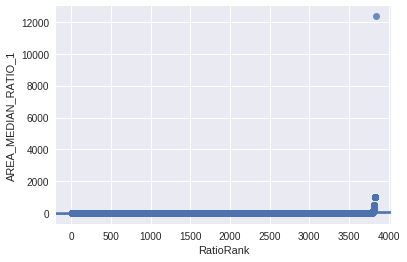

In [40]:
pd_file_path = '/usca/asperapoc/NB-CPACT/NB-CPACT-NIBR/NIBR_loaded_UCB_EN80/Analysis/PD2.1/KEA_isoTOP_DN_All.pdResult'
ip2_file_path = '/home/jonesmic/gBuild/jonesmic_github/proteomics-scripts/datanocommit/peptideList.csv'

print('Compare PD on Canonical FASTA vs. IP2')
print('{} vs. {}'.format(pd_file_path, ip2_file_path))
print('load PD')
pdReader = PDReader(pd_result_file=pd_file_path, include_non_quant=True)
pdDF = pdReader.get_target_peptides(include_additional_data=True)
print('Load IP2')
ip2DF = load_ip2_peptide_list(ip2_file_path)


do_sequence_overlap(ip2DF=ip2DF, pdDF=pdDF)   


In [41]:
pdDF.index.size

282529

Compare PD on Canonical+Alternative FASTA vs. IP2
/da/dmp/cb/jonesmic/chemgx/data/isoTopAnalysis/jonesmic/pd/pd2.2/KEA_EN80_NomiraFastaSequest_FullTryptic/KEA_EN80.pdResult vs. /home/jonesmic/gBuild/jonesmic_github/proteomics-scripts/datanocommit/peptideList.csv
load PD
Load IP2
Records: Tot 4353, Forward 3838 , Decoy 515 (12%)
Sequences: Tot 2539, Forward 2046, Decoy 494 (19%)
Peptide sequences seen in both the decoy and forward sets {'VLILDEATSALDVQCEQALQDWNSR'}
Num IP2 Peps 2046, num PD Peps 398033, num common peps 1527, percent IP2 Covered in PD 75%
Num IP2 Peps 2046, num PD Peps with ratios 2974, num common peps 930, percent IP2 Covered in PD 45%


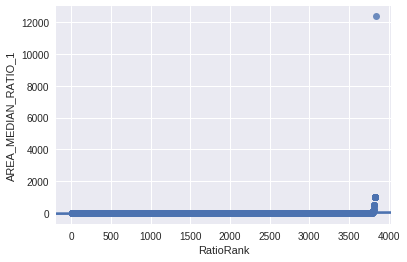

In [42]:
pd_file_path = '/da/dmp/cb/jonesmic/chemgx/data/isoTopAnalysis/jonesmic/pd/pd2.2/KEA_EN80_NomiraFastaSequest_FullTryptic/KEA_EN80.pdResult'
ip2_file_path = '/home/jonesmic/gBuild/jonesmic_github/proteomics-scripts/datanocommit/peptideList.csv'


print('Compare PD on Canonical+Alternative FASTA vs. IP2')
print('{} vs. {}'.format(pd_file_path, ip2_file_path))
print('load PD')
pdReader = PDReader(pd_result_file=pd_file_path, include_non_quant=True)
pdDF = pdReader.get_target_peptides(include_additional_data=True)
print('Load IP2')
ip2DF = load_ip2_peptide_list(ip2_file_path)


do_sequence_overlap(ip2DF=ip2DF, pdDF=pdDF)   

In [44]:
mergeDF = pd.merge(pdDF, ip2DF, left_on='Sequence', right_on='sequence')

Index(['PeptideGroupID', 'Checked', 'Confidence', 'ExcludedBy', 'Sequence',
       'Modifications_all_positions', 'Modifications_best_positions',
       'QvalityPEP', 'Qvalityqvalue', 'ParentProteinGroupCount',
       'ParentProteinCount', 'PsmCount', 'MasterProteinAccessions',
       'MissedCleavages', 'TheoreticalMass', 'QuanInfo', 'FILES',
       'ABUNDANCE_RATIOS', 'ABUNDANCE_LOG2_RATIO', 'ABUNDANCES',
       'ISOTOP_LIGHT_1', 'ISOTOP_HEAVY_2', 'QUANTILE_NORM_ABUNDANCE_RATIO',
       'QUANTILE_NORM_ABUNDANCE_LOG2_RATIO', 'MOD_LOCS', 'GLOBAL_MOD_LOCS',
       'ISOTOP_MOD_LOCS', 'GLOBAL_ISOTOP_LOCS', 'protein_isotop_locs',
       'in_ip2', 'IN_IP2', 'NEG_LOG10_Q'],
      dtype='object')


IN_IP2       
False   count    520165.000000
        mean          0.807629
        std           0.231221
        min           0.000000
        25%           0.804735
        50%           0.901296
        75%           0.936998
        max           0.952610
True    count      3876.000000
        mean          0.257483
        std           0.389626
        min           0.000000
        25%           0.000000
        50%           0.000000
        75%           0.715931
        max           0.952570
Name: Qvalityqvalue, dtype: float64

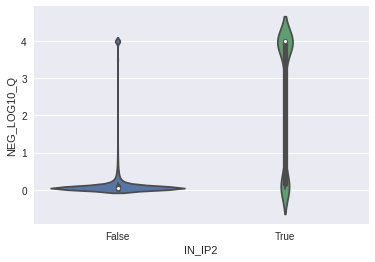

In [58]:
pdDF['IN_IP2'] = pdDF.Sequence.isin(ip2DF.sequence)
pdDF['NEG_LOG10_Q'] = pdDF.Qvalityqvalue.apply(lambda x : -np.log10(x+0.0001))
print(pdDF.columns)
sns.violinplot(y='NEG_LOG10_Q', x='IN_IP2', data=pdDF)

pdDF.groupby('IN_IP2')['Qvalityqvalue'].describe()
